In [1]:
import numpy as np
from matplotlib import pyplot as plt

from VectorAlgebra import *
from Bio.PDB.PDBParser import PDBParser

def checkIfNative(xyz_CAi, xyz_CAj):
    v = vector(xyz_CAi, xyz_CAj)
    r = vabs(v)
    if r< 12: return True
    else: return False

N = 58
M = 100

In [2]:
sigma = np.ones((N,M))*0
p = PDBParser(PERMISSIVE=1)
s = p.get_structure("1", "end-1.pdb")
for k in range(1 ,61):
        ca_atoms_pdb = []
        chains = s[0].get_list()
        chain = chains[0]
        for res in chain:
                is_regular_res = res.has_id('CA') and res.has_id('O')
        #        res_id = res.get_id()[0]
                if is_regular_res:
                        ca_atoms_pdb.append(res['CA'].get_coord())

        for i in range(N):
                for j in range(M):
                       if 200+i-(100+j) >=8 :
                                xyz_CAi = ca_atoms_pdb[200+i]
                                xyz_CAj = ca_atoms_pdb[100+j]
                                if checkIfNative(xyz_CAi, xyz_CAj):
                                     sigma[i][j] += 1
        if k != 60:
            p = PDBParser(PERMISSIVE=1)
            pdb_id = str(k+1)
            pdb_file = "end-" + str(k+1) + ".pdb"
            s = p.get_structure(pdb_id, pdb_file)

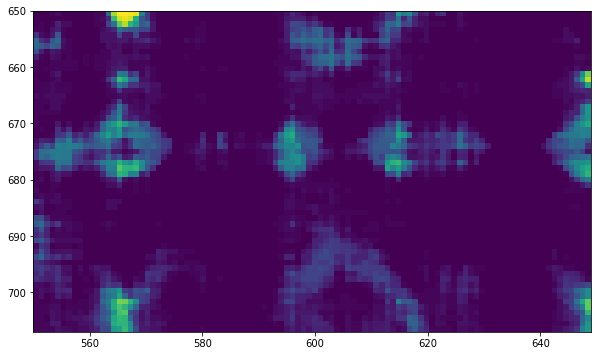

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(sigma, extent=[550,649,707,650], interpolation='nearest')
#plt.colorbar()
plt.savefig("contact-zz_d2.png")

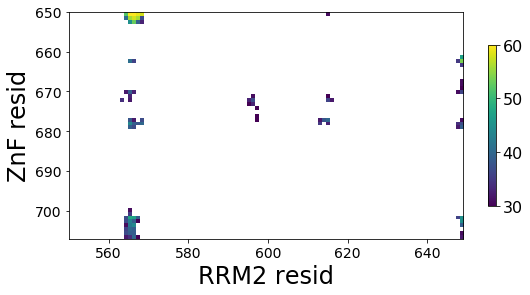

In [11]:
sigma50 = np.ones((N,M))*0
for i in range(N):
    for j in range(M):
        
        if sigma[i][j] >= 30:
                sigma50[i][j] = sigma[i][j]
                #print(i,j,sigma[i][j])
        else:
                sigma50[i][j] = np.nan


plt.figure(figsize=(8,5))
plt.imshow(sigma50, extent=[550,649,707,650])
cbar=plt.colorbar(shrink=0.5)
cbar.ax.tick_params(labelsize=16)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel("RRM2 resid", fontsize=24)
plt.ylabel("ZnF resid", fontsize=24)
plt.tight_layout()
plt.savefig("contact30-zz_d2.png")